In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn.preprocessing import scale

import os
#sklearn.tree의 Decision Tree classifier:분류의사결정나무
from sklearn.tree import DecisionTreeClassifier
#sklearn.tree의 export_graphviz: graphviz패키지가 사용할수 있는.dot 확장자 파일로저장
from sklearn.tree import export_graphviz
#graphviz import:의사결정 나무 모델 시각화 .dot확장자 파일 불러오는 패키지
import graphviz

#pandas describe 생략되는 것 표시
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import scale
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [8]:
b_cancer = pd.read_csv("/home/pirl/Downloads/유방암.csv",engine = 'python',
                        encoding='CP949')
#sns.countplot(b_cancer["diagnosis"],label="Count")
#b_cancer.describe()
# print(b_cancer.isnull().sum(axis=0))
#b_cancer.head()

In [9]:
#데이터 구성하기
#데이터분할(train,test 7:3비율로 분할,numpy의 random 함수 이용 방법)
np.random.seed(1234)
#0.7보다 작으면 true, -> train, 아니면 false -> test
msk = np.random.rand(b_cancer.shape[0]) < 0.7
b_train = b_cancer[msk]
b_test = b_cancer[~msk]
#train/test 데이터의 목표변수 설명변수 지정
b_train_y = b_train["diagnosis"]
b_train_x = b_train.drop("diagnosis",axis=1,inplace=False)
b_test_y = b_test["diagnosis"]
b_test_x = b_test.drop("diagnosis",axis=1,inplace=False)
#데이터 크기
print("train data X size: {}".format(b_train_x.shape))
print("train data Y size: {}".format(b_train_y.shape))
print("test data X size: {}".format(b_test_x.shape))
print("test data X size: {}".format(b_test_y.shape))

train data X size: (385, 30)
train data Y size: (385,)
test data X size: (184, 30)
test data X size: (184,)


In [15]:
svm_un=SVC(random_state=1234)
svm_un.fit(b_train_x,b_train_y)

print("Accuracy on training set:{:.3f}".format(svm_un.score(b_train_x,b_train_y)))
print("Accuracy on training set:{:.3f}".format(svm_un.score(b_test_x,b_test_y)))
print()
print(svm_un)

Accuracy on training set:1.000
Accuracy on training set:0.652

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1234,
  shrinking=True, tol=0.001, verbose=False)


In [ ]:
#### 설명변수에 스케일없이 바로 SVM모델링하였고, 정확도는 65%정도로 상당히 낮은 결과를 보여주었다. 

In [17]:
#C를 0.1부터 1까지 0.1단위 조정
train_ac=[]
test_ac=[]
para_C=[]

for C in range(10):
    svm1 = SVC(C=(C+1)/10,random_state=1234)
    svm1.fit(b_train_x, b_train_y)
    para_C.append((C+1)/10)
    train_ac.append(svm1.score(b_train_x,b_train_y))
    test_ac.append(svm1.score(b_test_x,b_test_y))
    
ds_acc1 =  pd.DataFrame()
ds_acc1['C'] = para_C
ds_acc1["TrainAccuraccy"] =train_ac
ds_acc1["TestAccuracy"] = test_ac

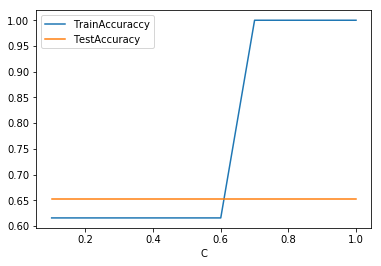

In [18]:
ds_acc1.round(3)
ds_acc1.set_index("C",inplace=False).plot.line()

In [22]:
#Gamma를 0.1부터 1까지 0.1단위 조정
train_ac=[]
test_ac=[]
para_g=[]

for gamma in range(1,10):
    svm2 = SVC(gamma=gamma/10,random_state=1234)
    svm2.fit(b_train_x, b_train_y)
    para_g.append(gamma/10)
    train_ac.append(svm2.score(b_train_x,b_train_y))
    test_ac.append(svm2.score(b_test_x,b_test_y))
    
ds_acc2 =  pd.DataFrame()
ds_acc2['Gamma'] = para_g
ds_acc2["TrainAccuraccy"] =train_ac
ds_acc2["TestAccuracy"] = test_ac

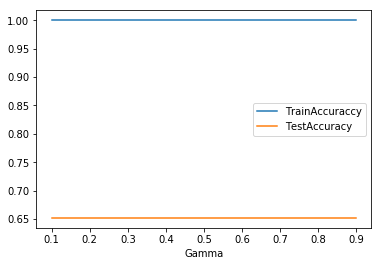

In [23]:
ds_acc2.round(3)
ds_acc2.set_index("Gamma",inplace=False).plot.line()

In [25]:
b_train_x_scaled = scale(b_train_x,axis=0)

b_test_x_scaled = scale(b_test_x,axis=0)

pd.DataFrame(b_train_x_scaled, columns =b_train_x.columns).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.034153,-2.040907,1.201746,0.913932,1.568430,3.222477,2.556376,2.431039,2.260749,2.388981,2.313143,-0.539984,2.577914,2.279170,-0.172321,1.231183,0.634248,0.579991,1.123777,0.814252,1.856617,-1.340180,2.256284,1.981249,1.369113,2.559731,2.062455,2.222408,2.981240,2.037489
1,1.762845,-0.339344,1.614265,1.818637,-0.814344,-0.520929,-0.062085,0.494636,0.011884,-0.890952,0.445579,-0.845669,0.209500,0.663077,-0.571100,-0.711593,-0.438542,0.198585,-0.800247,-0.113605,1.775545,-0.351425,1.489403,1.870090,-0.341948,-0.457913,-0.174963,1.031413,-0.228790,0.308815
2,1.514299,0.461934,1.495819,1.476241,0.945482,1.007967,1.295044,1.947756,0.964040,-0.396878,1.129958,-0.751146,0.751074,1.069545,-0.256900,0.746029,0.163661,1.307289,0.226137,0.248681,1.480360,-0.006661,1.302141,1.434275,0.575965,1.040829,0.818388,1.886410,1.267837,0.225505
3,-0.530558,-0.815966,-0.441388,-0.544453,2.233850,1.197997,0.808688,0.764469,1.030728,2.005032,-0.262165,-0.566914,-0.329336,-0.292276,0.205058,0.388917,0.114801,-0.114879,0.124810,0.426860,-0.203440,-0.296132,-0.157312,-0.272638,2.122158,1.673337,1.223245,0.852914,1.912964,2.355685
4,1.107587,0.169513,1.071047,1.022497,-0.114236,0.050290,0.254783,0.591041,-0.054803,-0.779339,0.117782,-0.775579,0.110037,0.252126,-0.880544,-0.671614,-0.318224,-0.266207,-0.824089,-0.585379,1.336925,0.339728,1.322948,1.252538,0.567053,-0.010622,0.475853,1.139413,0.314019,-0.000125


In [26]:
svm_un_scaled = SVC(random_state=1234)
svm_un_scaled.fit(b_train_x_scaled,b_train_y)
print("Accuracy on training set:{:.3f}".format(svm_un_scaled.score(b_train_x_scaled,b_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_un_scaled.score(b_test_x_scaled,b_test_y)))

Accuracy on training set:0.987
Accuracy on test set: 0.978


In [28]:
#c를 0.1부터 1까지 0.1단위 조정
train_ac=[]
test_ac=[]
para_C=[]

for C in range(15):
    svm1_scaled = SVC(C=C+1,random_state=1234)
    svm1_scaled.fit(b_train_x_scaled, b_train_y)
    para_C.append(C+1)
    train_ac.append(svm1_scaled.score(b_train_x_scaled,b_train_y))
    test_ac.append(svm1_scaled.score(b_test_x_scaled,b_test_y))
    
ds_acc3_scaled =  pd.DataFrame()
ds_acc3_scaled['C'] = para_C
ds_acc3_scaled["TrainAccuraccy"] =train_ac
ds_acc3_scaled["TestAccuracy"] = test_ac

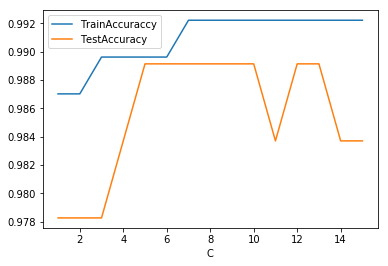

In [29]:
ds_acc3_scaled.round(3)
ds_acc3_scaled.set_index("C",inplace=False).plot.line()

In [34]:
#Gamma를 0.1부터 1까지 0.1단위 조정
train_ac=[]
test_ac=[]
para_g=[]

for gamma in range(1,10):
    svm2_scaled = SVC(gamma=gamma/10,random_state=1234)
    svm2_scaled.fit(b_train_x_scaled, b_train_y)
    para_g.append(gamma/10)
    train_ac.append(svm2_scaled.score(b_train_x_scaled,b_train_y))
    test_ac.append(svm2_scaled.score(b_test_x_scaled,b_test_y))
    
ds_acc2_scaled =  pd.DataFrame()
ds_acc2_scaled['Gamma'] = para_g
ds_acc2_scaled["TrainAccuraccy"] =train_ac
ds_acc2_scaled["TestAccuracy"] = test_ac

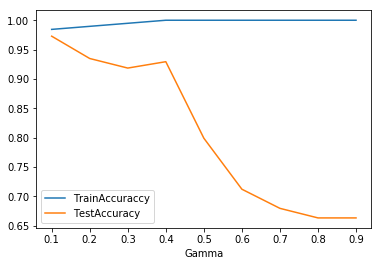

In [35]:
ds_acc2_scaled.round(3)
ds_acc2_scaled.set_index("Gamma",inplace=False).plot.line()